## 2022 Predict Ideology Score for NBA Teams

In [1]:
from fastai.text.all import *
import transformers
from ideology_utils import *

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
transformers.utils.logging.set_verbosity(40) 

### Download Unlimited Tweets using Unofficial Twitter API

Twitter handles for a selected **NBA Teams** were copied and pasted into a csv `handles_group.csv` file manually from here: https://www.4icu.org/twitter/us/

Used `node index.js handles_group.csv 500`
This should be done in mamba environment containing `npm` and `nodejs`. The program itself is `index.js`. All of this is located in `twitterAPI` and is available from github: https://github.com/colindaniels/twitterAPI

To load these tweeets, reference the directory that then contains `json` files for each member of the group.

In [3]:
group = Path('tweets/tweets-nba-2022-500')

### Download Tweets using Official Twitter API (faster, but limited to past week and subject to rate limits) 

In [4]:
#group = get_tweets_of_group("handles/handles_nfl.csv", "tweets-nfl")

### Ideology of a Select Group using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

In [4]:
trainer,tokz = load_tfms_model()

In [6]:
scores_tfms = scores_of_group_tfms(group, [trainer,tokz])

['lakers', 0.53, 0.48, 500]
['raptors', 0.49, 0.48, 500]
['hornets', 0.59, 0.55, 500]
['bucks', 0.49, 0.51, 500]
['sixers', 0.53, 0.46, 496]
['trailblazers', 0.32, 0.34, 500]
['nuggets', 0.43, 0.43, 500]
['memgrizz', 0.47, 0.45, 500]
['sacramentokings', 0.49, 0.45, 499]
['detroitpistons', 0.43, 0.44, 497]
['warriors', 0.47, 0.46, 498]
['atlhawks', 0.44, 0.45, 500]
['timberwolves', 0.5, 0.51, 499]
['brooklynnets', 0.5, 0.47, 500]
['orlandomagic', 0.45, 0.43, 500]
['cavs', 0.57, 0.53, 500]
['houstonrockets', 0.54, 0.49, 496]
['pacers', 0.5, 0.5, 500]
['suns', 0.53, 0.46, 500]
['utahjazz', 0.63, 0.62, 495]
['chicagobulls', 0.33, 0.42, 498]
['pelicansnba', 0.42, 0.43, 499]
['okcthunder', 0.57, 0.55, 500]
['laclippers', 0.41, 0.41, 500]
['nyknicks', 0.48, 0.47, 500]
['miamiheat', 0.48, 0.48, 500]
['washwizards', 0.2, 0.22, 499]
['dallasmavs', 0.6, 0.53, 500]
['spurs', 0.3, 0.3, 499]
['celtics', 0.44, 0.44, 500]


In [7]:
df = scores2df(scores_tfms,'s1')

### Ideology of NBA Teams using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.
**0 is Progressive, 1 is Conservative**

<AxesSubplot:ylabel='handle'>

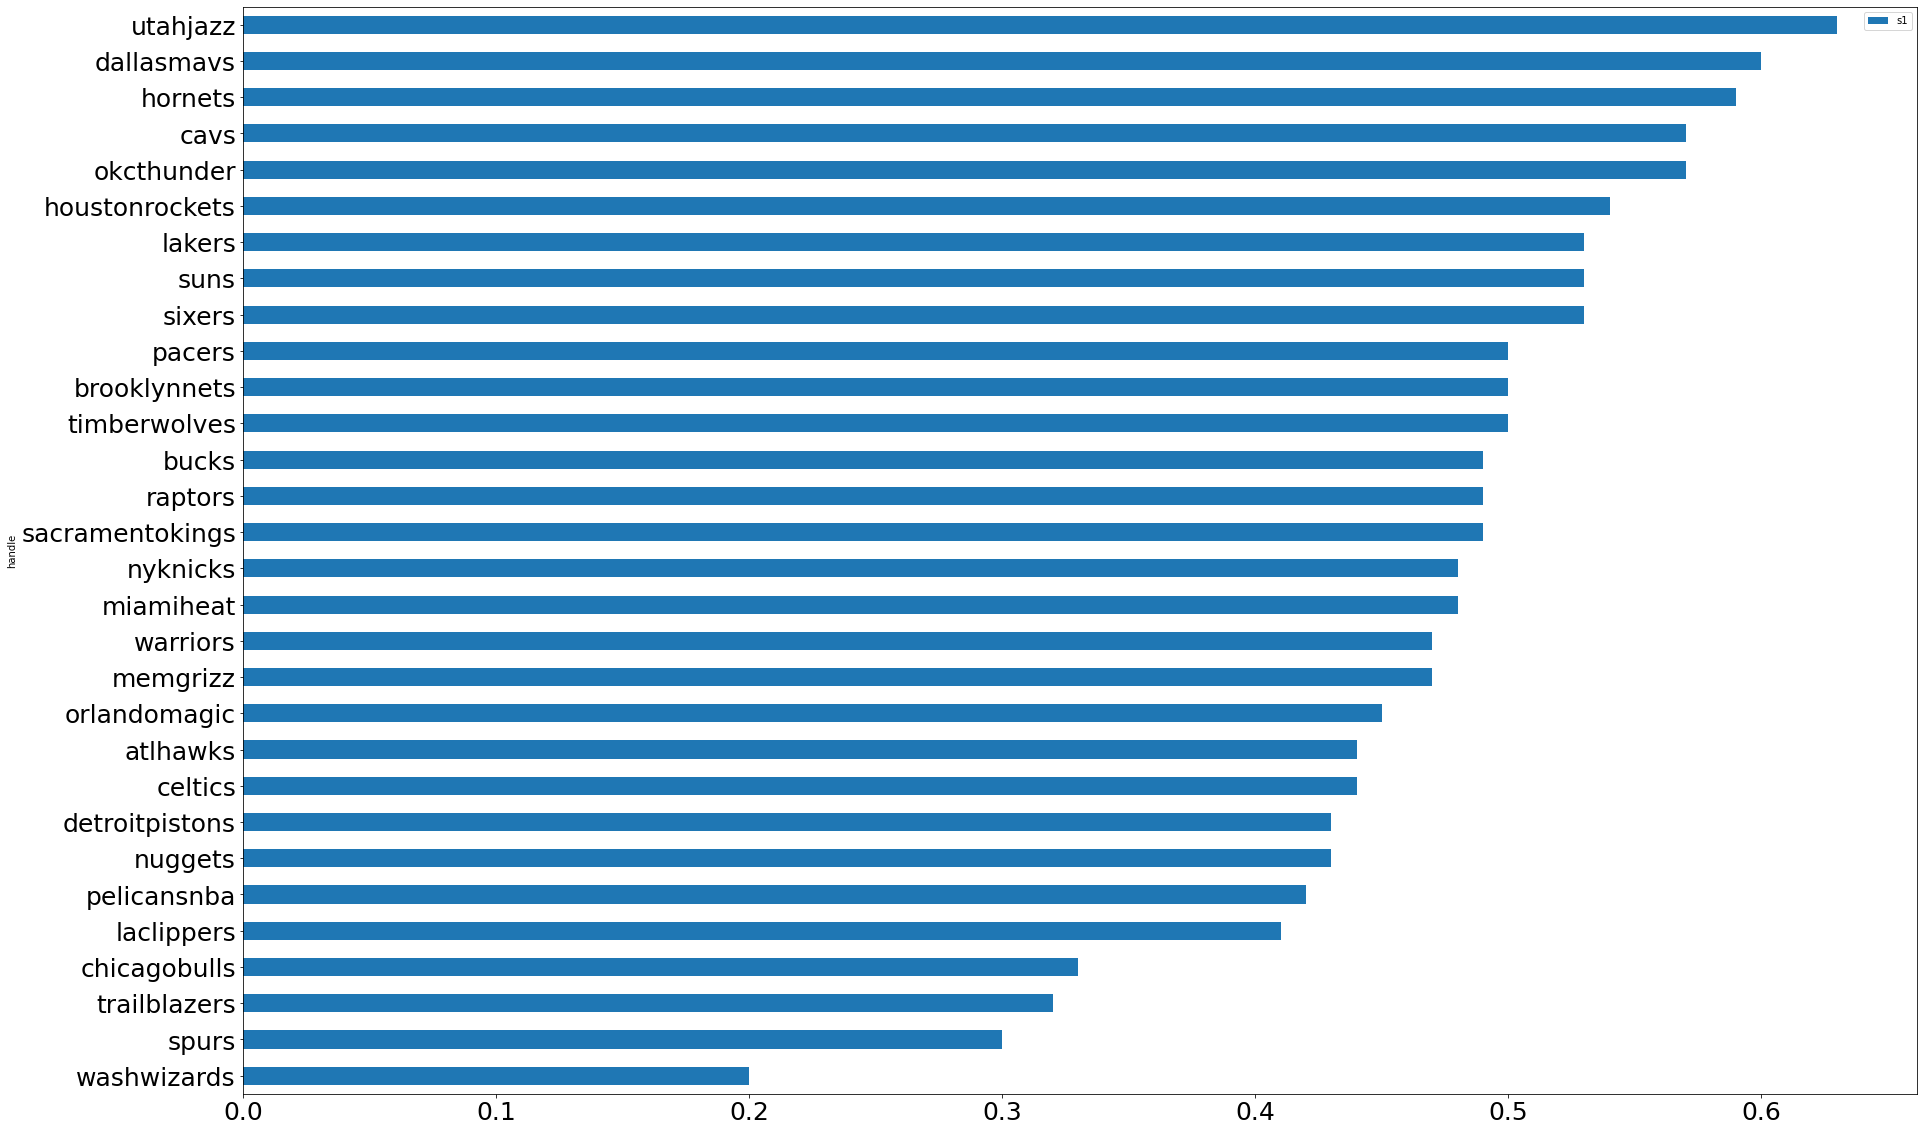

In [8]:
df.plot.barh(y='s1',x='handle',figsize=(30,20),fontsize=25)